# Business Questions

### Q1. What are the demographic characteristics of the users? (Age range, gender, location...)
### Q2. What are the main characteristics of the memberships? (Start date, end date, principal subscription plan, proportion of renewal status...)
### Q3. Find for correlations in the dataset, e.g., characteristics of the memberships and satisfaction of the users
### Q4. Construct an unsupervised algorithm, such as clustering for customer personas or recommendation engines

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv('amazon_prime_users.csv')
df

,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Los Angeles,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Charlotte,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,New York,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Houston,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Los Angeles,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Michael Lopez,williamsroberto@example.org,williamsroberto,1967-08-19,Male,Charlotte,2024-01-25,2025-01-24,Annual,Visa,Auto-renew,Frequent,Electronics,Comedy,Smartphone,Medium,4.9,2
2496,Matthew Woodard,lkaiser@example.com,lkaiser,1980-10-23,Male,Austin,2024-03-03,2025-03-03,Annual,Amex,Manual,Frequent,Books,Comedy,Smart TV,Medium,4.0,0
2497,Morgan Barnes,erikaholland@example.net,erikaholland,1972-03-31,Female,Austin,2024-02-09,2025-02-08,Annual,Visa,Manual,Frequent,Electronics,Documentary,Tablet,Low,4.9,8
2498,Gina Castaneda,reedcourtney@example.net,reedcourtney,1965-08-02,Female,New York,2024-02-18,2025-02-17,Monthly,Visa,Manual,Regular,Clothing,Comedy,Smartphone,High,3.4,7


In [3]:
df.dtypes

Name                              object
Email Address                     object
Username                          object
Date of Birth                     object
Gender                            object
Location                          object
Membership Start Date             object
Membership End Date               object
Subscription Plan                 object
Payment Information               object
Renewal Status                    object
Usage Frequency                   object
Purchase History                  object
Favorite Genres                   object
Devices Used                      object
Engagement Metrics                object
Feedback/Ratings                 float64
Customer Support Interactions      int64
dtype: object

In [4]:
columns_of_date = ['Date of Birth', 'Membership Start Date', 'Membership End Date']

for col in columns_of_date:
    df[col] = pd.to_datetime(df[col])

In [5]:
df.dtypes

Name                                     object
Email Address                            object
Username                                 object
Date of Birth                    datetime64[ns]
Gender                                   object
Location                                 object
Membership Start Date            datetime64[ns]
Membership End Date              datetime64[ns]
Subscription Plan                        object
Payment Information                      object
Renewal Status                           object
Usage Frequency                          object
Purchase History                         object
Favorite Genres                          object
Devices Used                             object
Engagement Metrics                       object
Feedback/Ratings                        float64
Customer Support Interactions             int64
dtype: object

In [6]:
df.isna().any()

Name                             False
Email Address                    False
Username                         False
Date of Birth                    False
Gender                           False
Location                         False
Membership Start Date            False
Membership End Date              False
Subscription Plan                False
Payment Information              False
Renewal Status                   False
Usage Frequency                  False
Purchase History                 False
Favorite Genres                  False
Devices Used                     False
Engagement Metrics               False
Feedback/Ratings                 False
Customer Support Interactions    False
dtype: bool

In [7]:
df[['Feedback/Ratings', 'Customer Support Interactions']].describe()

,Feedback/Ratings,Customer Support Interactions
count,2500.000000,2500.000000
mean,4.004760,4.951600
std,0.580769,3.191572
min,3.000000,0.000000
25%,3.500000,2.000000
50%,4.000000,5.000000
75%,4.500000,8.000000
max,5.000000,10.000000


In [8]:
columns_of_selection = ['Gender', 'Payment Information', 'Renewal Status', 'Usage Frequency', 'Purchase History', 'Favorite Genres', 'Devices Used', 'Engagement Metrics']

for col in columns_of_selection:
    print('Unique values of the column', col, ':', df[col].unique())
    print(50*'-')

Unique values of the column Gender : ['Male' 'Female']
--------------------------------------------------
Unique values of the column Payment Information : ['Mastercard' 'Visa' 'Amex']
--------------------------------------------------
Unique values of the column Renewal Status : ['Manual' 'Auto-renew']
--------------------------------------------------
Unique values of the column Usage Frequency : ['Regular' 'Frequent' 'Occasional']
--------------------------------------------------
Unique values of the column Purchase History : ['Electronics' 'Books' 'Clothing']
--------------------------------------------------
Unique values of the column Favorite Genres : ['Documentary' 'Horror' 'Comedy' 'Drama' 'Action' 'Sci-Fi' 'Romance']
--------------------------------------------------
Unique values of the column Devices Used : ['Smart TV' 'Smartphone' 'Tablet']
--------------------------------------------------
Unique values of the column Engagement Metrics : ['Medium' 'Low' 'High']
---------

### As we can see, there's not much to do with the data cleaning part as it is already very clean.

# Exploratory Data Analysis

In [9]:
df['Age'] = np.int16(np.floor(((pd.Timestamp.now() - df['Date of Birth']).dt.days) / 365.25))

df['Age'].describe()

count    2500.00000
mean       54.24440
std        21.05356
min        18.00000
25%        36.00000
50%        54.00000
75%        73.00000
max        91.00000
Name: Age, dtype: float64

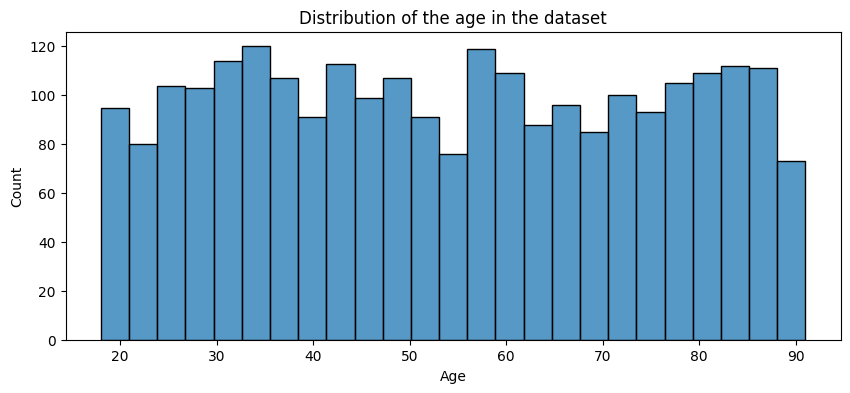

In [10]:
plt.figure(figsize=(10, 4))
sns.histplot(df['Age'], bins=25)
plt.title('Distribution of the age in the dataset')
plt.show()

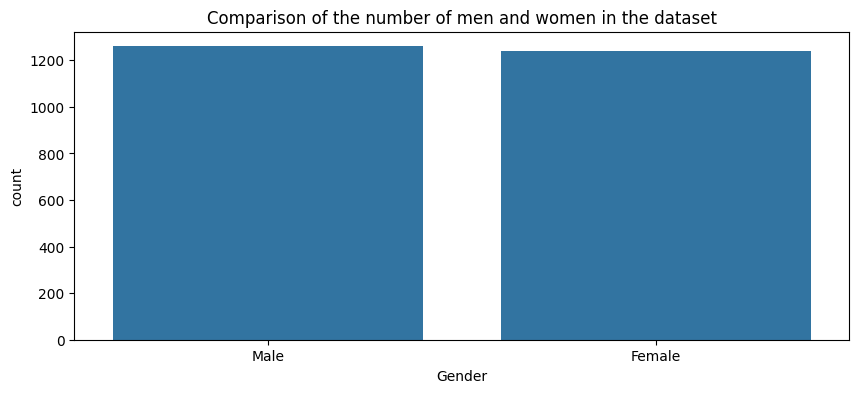

In [11]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Gender', data=df)
plt.title('Comparison of the number of men and women in the dataset')
plt.show()

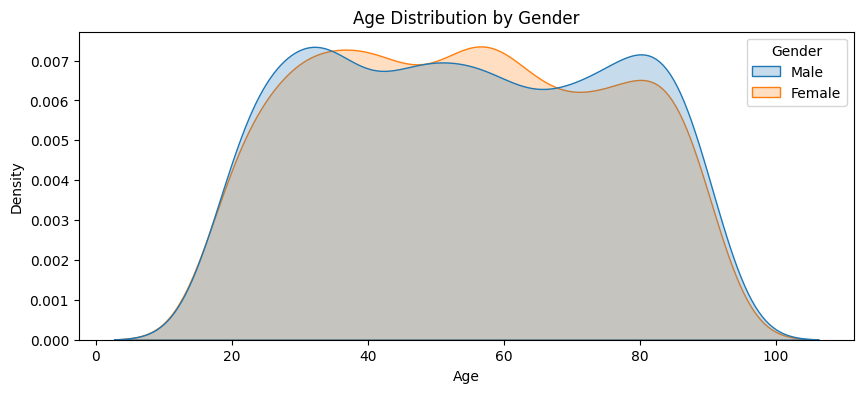

In [12]:
plt.figure(figsize=(10, 4))
sns.kdeplot(data=df, x='Age', hue='Gender', fill=True)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show;

In [13]:
from geopy.geocoders import Nominatim
import folium

geolocator = Nominatim(user_agent="geoapiExercises")

def geocode(location):
    try:
        location = geolocator.geocode(location)
        return (location.latitude, location.longitude)
    except:
        return None

In [14]:
# Calcular a contagem de cada cidade na coluna 'Location'
city_counts = df['Location'].value_counts().reset_index()
city_counts.columns = ['City', 'Count']

city_counts.head()

,City,Count
0,New York,308
1,Los Angeles,260
2,Chicago,212
3,Houston,165
4,Phoenix,111


In [17]:
coordinates = []
for i in range(len(city_counts['City'])):
    coordinate = geocode(city_counts.iloc[i, 0])
    coordinates.append(coordinate)

city_counts['Coordinates'] = coordinates

In [19]:
map = folium.Map(location=[city_counts['Coordinates'].apply(lambda x: x[0]).mean(),
                           city_counts['Coordinates'].apply(lambda x: x[1]).mean()],
                 zoom_start=5)

In [20]:
# Adicionar círculos vermelhos ao mapa
for i, row in city_counts.iterrows():
    folium.Circle(
        location=row['Coordinates'],
        radius=row['Count'] * 400,  # Ajuste o fator multiplicador conforme necessário
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(map)

# Exibir o mapa
map.save('map.html')
map

In [21]:
subscription_period = (df['Membership End Date'] - df['Membership Start Date']).dt.days
subscription_period

0       365
1       365
2       365
3       365
4       365
       ... 
2495    365
2496    365
2497    365
2498    365
2499    365
Length: 2500, dtype: int64

In [22]:
days_until_expiration = (df['Membership End Date'] - datetime.now()).dt.days
days_until_expiration.describe()

count    2500.000000
mean      225.883200
std        30.763331
min       174.000000
25%       199.000000
50%       226.000000
75%       253.000000
max       278.000000
Name: Membership End Date, dtype: float64

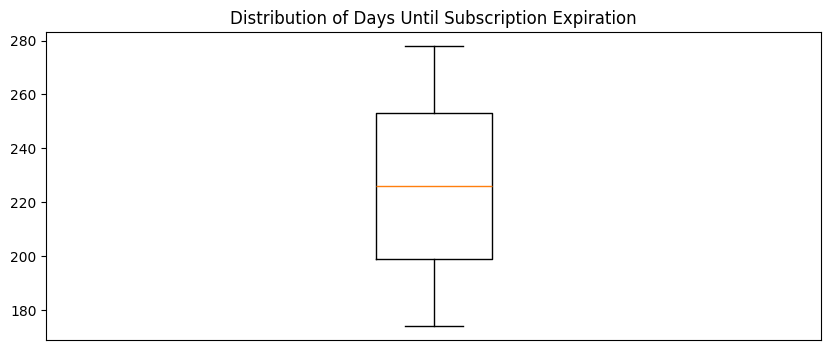

In [23]:
plt.figure(figsize=(10, 4))
plt.boxplot(days_until_expiration)
plt.gca().set_xticks([])
plt.title('Distribution of Days Until Subscription Expiration')
plt.show()

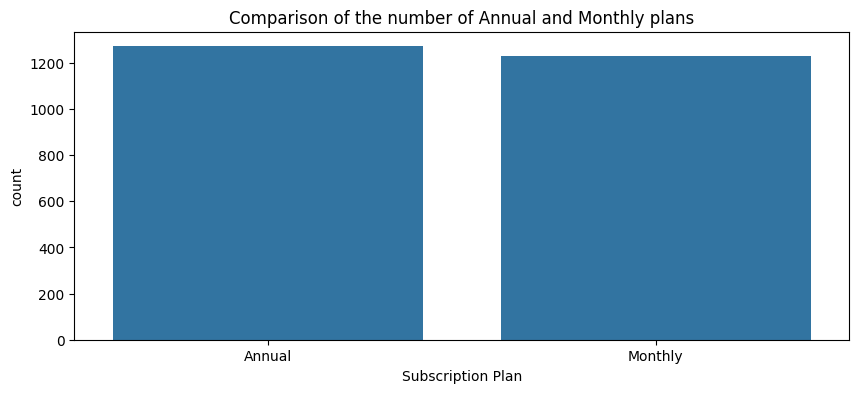

In [24]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Subscription Plan', data=df)
plt.title('Comparison of the number of Annual and Monthly plans')
plt.show()

In [25]:
monthly_plan_df = df[df['Subscription Plan'] == 'Monthly']
len(monthly_plan_df)

1229

#### There are 1229 people with monthly subscription plan, which indicates to have a more specific strategy of marketing to keep this users in the application

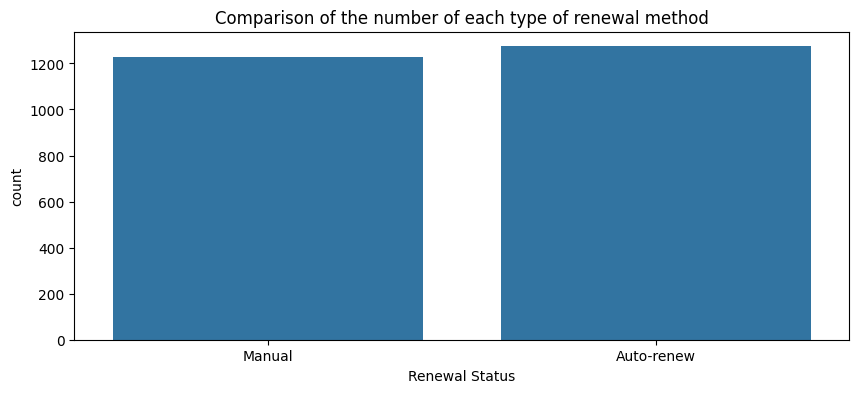

In [26]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Renewal Status', data=df)
plt.title('Comparison of the number of each type of renewal method')
plt.show()

In [27]:
manual_renewal_status_with_monthly_plan = monthly_plan_df[monthly_plan_df['Renewal Status'] == 'Manual']
len(manual_renewal_status_with_monthly_plan)

598

#### There are 598 people with monthly subscription plan and manual renewal status, which indicates to have a very strong strategy of marketing to keep this users in the application

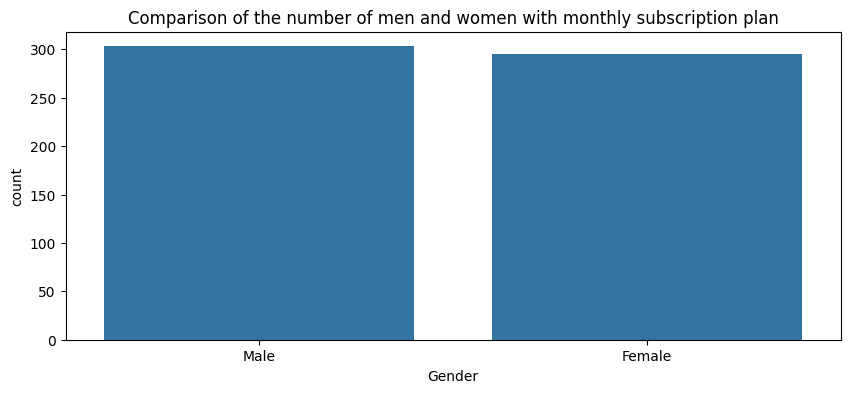

In [28]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Gender', data=manual_renewal_status_with_monthly_plan)
plt.title('Comparison of the number of men and women with monthly subscription plan')
plt.show()

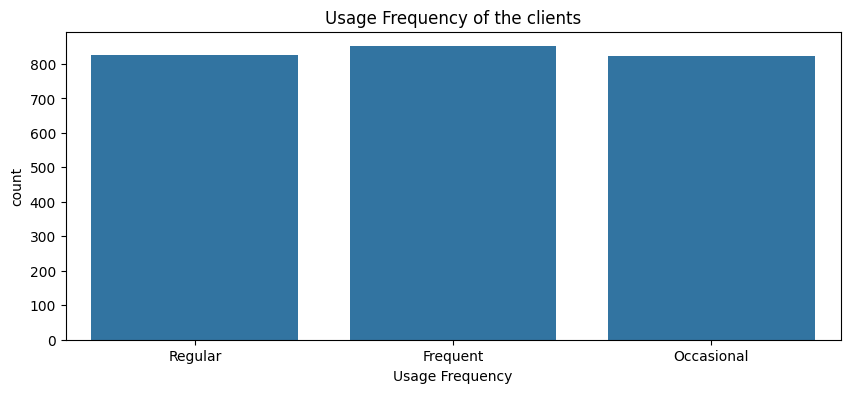

In [29]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Usage Frequency', data=df)
plt.title('Usage Frequency of the clients')
plt.show()

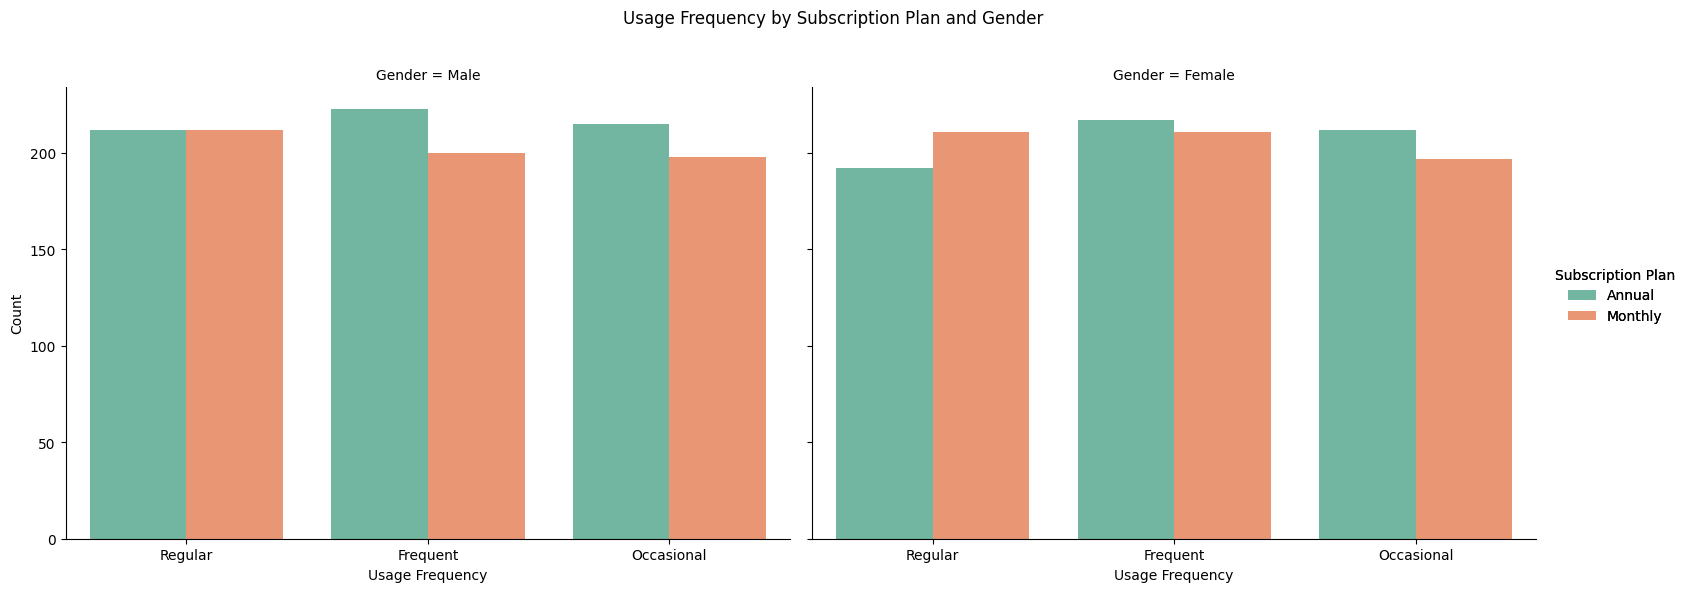

In [30]:
# Plotar gráfico de frequência de uso, separando por tipo de plano e gênero
g = sns.catplot(
    data=df,
    x='Usage Frequency',
    hue='Subscription Plan',
    col='Gender',
    kind='count',
    palette='Set2',
    height=6,
    aspect=1.2
)
g.figure.subplots_adjust(top=0.85)
g.figure.suptitle('Usage Frequency by Subscription Plan and Gender')
g.set_axis_labels('Usage Frequency', 'Count')
g.add_legend(title='Subscription Plan')

# Mostrar o gráfico
plt.show()

In [31]:
occasional_monthly_manual_users = df[(df['Usage Frequency'] == 'Occasional') & (df['Subscription Plan'] == 'Monthly') & (df['Renewal Status'] == 'Manual')]
occasional_monthly_manual_men = df[(df['Usage Frequency'] == 'Occasional') & (df['Subscription Plan'] == 'Monthly') & (df['Gender'] == 'Male') & (df['Renewal Status'] == 'Manual')]
occasional_monthly_manual_women = df[(df['Usage Frequency'] == 'Occasional') & (df['Subscription Plan'] == 'Monthly') & (df['Gender'] == 'Female') & (df['Renewal Status'] == 'Manual')]
print('Quantity of users with Occasional usage frequency and Monthly renewal status:', len(occasional_monthly_manual_users))
print('-'*75)
print('Proportion of men and women within this number')
print("{:^{width}} {:^{width}}".format("Men", "Women", width=20))
print("{:^{width}} {:^{width}}".format(len(occasional_monthly_manual_men), len(occasional_monthly_manual_women), width=20))

Quantity of users with Occasional usage frequency and Monthly renewal status: 197
---------------------------------------------------------------------------
Proportion of men and women within this number
        Men                 Women        
        101                   96         


#### There are 197 users with a strong possibility of leaving the application, considering that they have an occasional frequency, a monthly subscription plan, and a manual renewal status.

In [32]:
### Fazer uma análise aqui dos usuários com menos de 180 dias para sair da plataforma

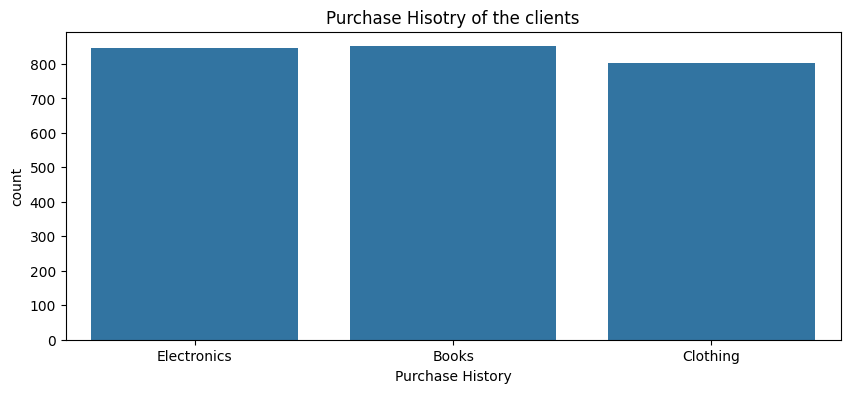

In [33]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Purchase History', data=df)
plt.title('Purchase Hisotry of the clients')
plt.show()

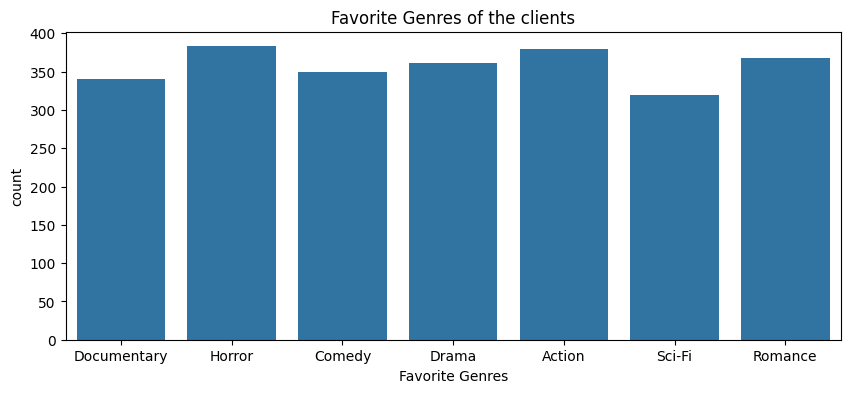

In [34]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Favorite Genres', data=df)
plt.title('Favorite Genres of the clients')
plt.show()

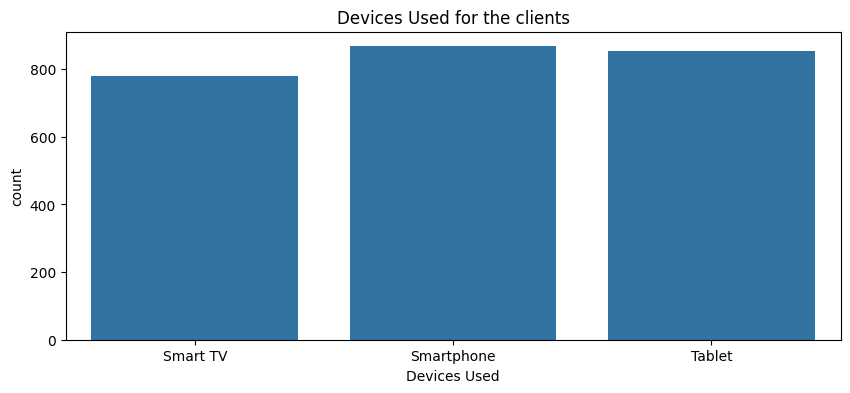

In [35]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Devices Used', data=df)
plt.title('Devices Used for the clients')
plt.show()

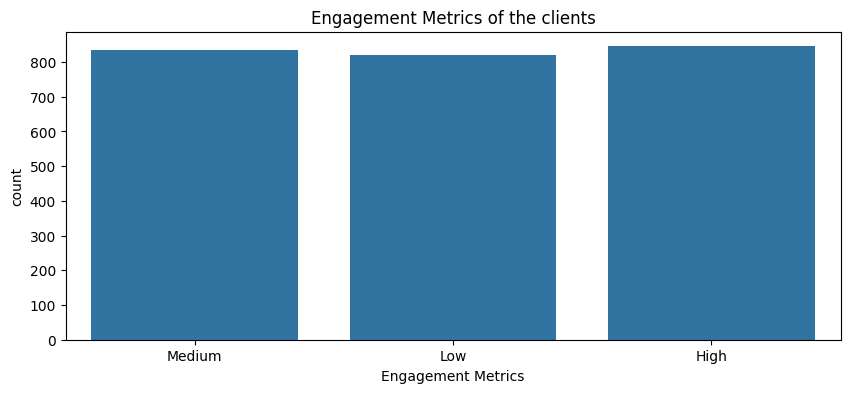

In [36]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Engagement Metrics', data=df)
plt.title('Engagement Metrics of the clients')
plt.show()

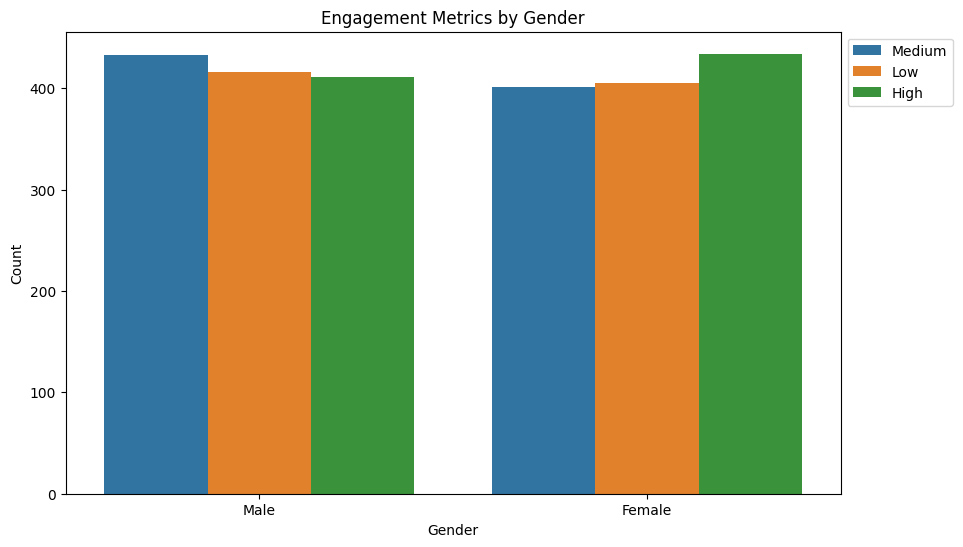

In [37]:
# Plotar gráfico de barras para métrica de engajamento por gênero
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Engagement Metrics', data=df)
plt.title('Engagement Metrics by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

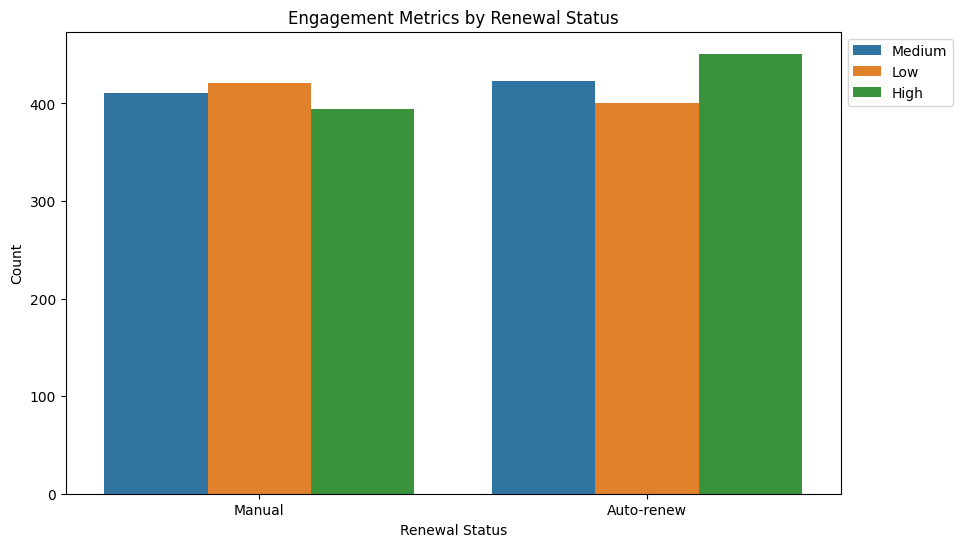

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Renewal Status', hue='Engagement Metrics', data=df)
plt.title('Engagement Metrics by Renewal Status')
plt.xlabel('Renewal Status')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

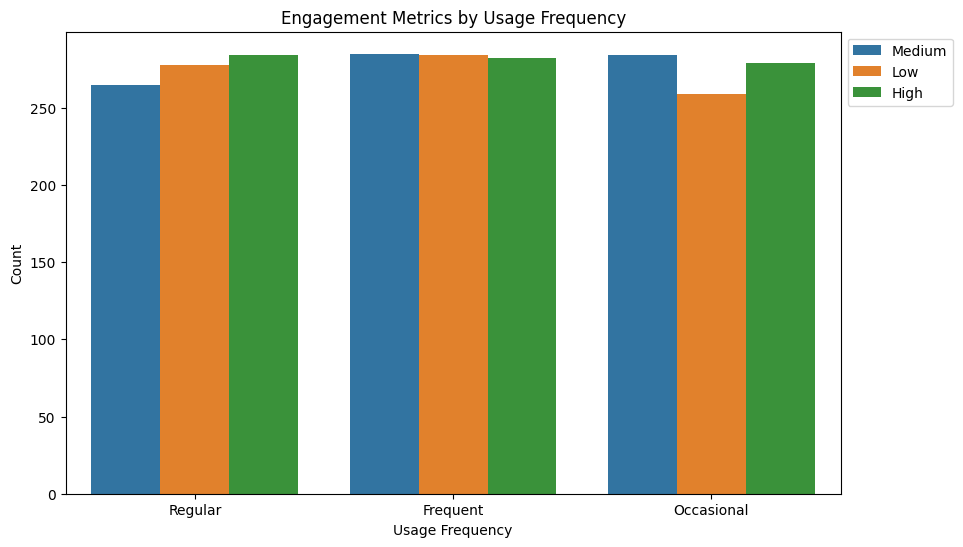

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Usage Frequency', hue='Engagement Metrics', data=df)
plt.title('Engagement Metrics by Usage Frequency')
plt.xlabel('Usage Frequency')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

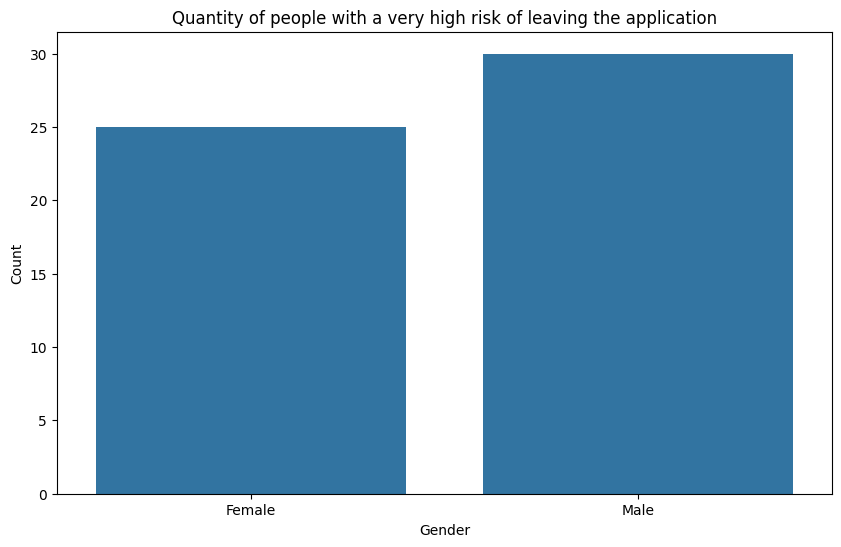

In [40]:
# Filtrar os dados de acordo com as condições especificadas
df_with_high_risk_of_giving_up = df[(df['Engagement Metrics'] == 'Low') & 
                 (df['Subscription Plan'] == 'Monthly') & 
                 (df['Renewal Status'] == 'Manual') & 
                 (df['Usage Frequency'] == 'Occasional')].reset_index(drop=True)

# Agrupar por coluna 'Gender' e contar as ocorrências
grouped_df = df_with_high_risk_of_giving_up.groupby('Gender').size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Count', data=grouped_df)
plt.title('Quantity of people with a very high risk of leaving the application')
plt.xlabel('Gender')
plt.show()

Coeficient of correlation:  0.00802579571523021


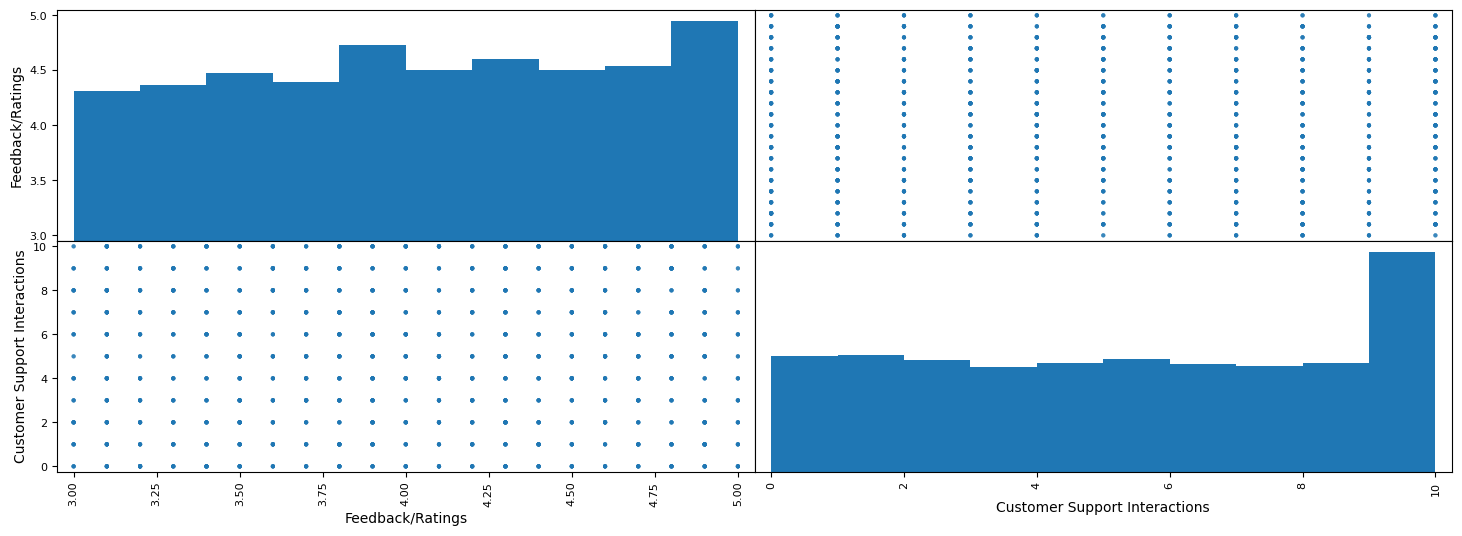

In [41]:
pd.plotting.scatter_matrix(df[['Feedback/Ratings', 'Customer Support Interactions']], figsize=(18, 6));

correlation = df['Feedback/Ratings'].corr(df['Customer Support Interactions'])

print('Coeficient of correlation: ', correlation)

In [42]:
df[['Feedback/Ratings', 'Customer Support Interactions']].describe()

,Feedback/Ratings,Customer Support Interactions
count,2500.000000,2500.000000
mean,4.004760,4.951600
std,0.580769,3.191572
min,3.000000,0.000000
25%,3.500000,2.000000
50%,4.000000,5.000000
75%,4.500000,8.000000
max,5.000000,10.000000
